In [1]:
# Carregando bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data per tons (t)

Os dados foram obtidos do KAGGLE: \
https://www.kaggle.com/datasets/elmoallistair/emmision-of-air-pollutants

In [2]:
# Carregando database csv

df = pd.read_csv('air-pollution.csv', sep=',')
df.head()

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,Afghanistan,1750,555.42,139.42,142073.31,5456.88,13311.29,1633.03,7628.36
1,Afghanistan,1760,578.45,145.09,147859.24,5679.12,13853.64,1699.54,7946.02
2,Afghanistan,1770,602.42,150.99,153867.41,5909.88,14416.85,1768.60,8276.90
3,Afghanistan,1780,627.37,157.11,160104.42,6149.44,15001.56,1840.29,8621.53
4,Afghanistan,1790,653.34,163.46,166576.77,6398.04,15608.38,1914.68,8980.49


In [3]:
# Tipo de dados das colunas
df.dtypes

Country             object
Year                 int64
Nitrogen Oxide     float64
Sulphur Dioxide    float64
Carbon Monoxide    float64
Organic Carbon     float64
NMVOCs             float64
Black Carbon       float64
Ammonia            float64
dtype: object

In [4]:
# Verificando se há células em branco
df.isnull().sum()

Country            0
Year               0
Nitrogen Oxide     0
Sulphur Dioxide    0
Carbon Monoxide    0
Organic Carbon     0
NMVOCs             0
Black Carbon       0
Ammonia            0
dtype: int64

In [5]:
# Inserindo variáveis para consultas e gerar gráficos

country_ref = 'Brazil'
column_ref = 'Year'
year_ref = 2019
item_ref = 'Black Carbon'
continents = ['Asia', 'Africa', 'Europe', 'South America', 'North America','Oceania']
continents_all = ['Asia', 'Africa', 'Europe', 'South America', 'North America','Oceania', 'World', 'Upper-middle-income countries',
             'Low-income countries','Lower-middle-income countries','High-income countries']
num_ranking = 5

Criando duas bases de dados:
- Somente os países
- Somente os continentes, conjunto de países e mundo

In [6]:
# Dataframe com Países

df_countries = df.loc[(df['Country'].apply(lambda x: x not in continents_all))]
df_countries

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,Afghanistan,1750,555.42,139.42,142073.31,5456.88,13311.29,1633.03,7628.36
1,Afghanistan,1760,578.45,145.09,147859.24,5679.12,13853.64,1699.54,7946.02
2,Afghanistan,1770,602.42,150.99,153867.41,5909.88,14416.85,1768.60,8276.90
3,Afghanistan,1780,627.37,157.11,160104.42,6149.44,15001.56,1840.29,8621.53
4,Afghanistan,1790,653.34,163.46,166576.77,6398.04,15608.38,1914.68,8980.49
...,...,...,...,...,...,...,...,...,...
47530,Zimbabwe,2015,83842.10,67231.29,1610636.44,108275.48,299713.47,30912.24,112425.84
47531,Zimbabwe,2016,76234.43,59452.70,1632515.11,111975.72,302718.32,31570.53,115539.98
47532,Zimbabwe,2017,74381.80,53891.39,1657688.51,114613.20,306905.62,32344.41,118254.66
47533,Zimbabwe,2018,73062.53,51072.78,1653664.68,114583.51,306860.21,32365.56,119965.76


In [7]:
# DataFrame com Continentes, conjunto de países e mundo

df_continents_all = df.loc[(df['Country'].apply(lambda x: x in continents_all))]
df_continents_all

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
225,Africa,1750,1.752586e+04,7693.89,3.290205e+06,174831.67,4.048908e+05,47376.34,312994.88
226,Africa,1760,1.760228e+04,7700.59,3.295943e+06,175004.92,4.052302e+05,47419.62,313631.56
227,Africa,1770,1.768538e+04,7709.67,3.302747e+06,175232.50,4.057024e+05,47477.66,314398.75
228,Africa,1780,1.777541e+04,7721.05,3.310599e+06,175512.46,4.063026e+05,47549.94,315295.91
229,Africa,1790,1.787290e+04,7734.85,3.319571e+06,175845.49,4.070393e+05,47636.82,316331.16
...,...,...,...,...,...,...,...,...,...
46855,World,2015,1.025216e+08,81816389.25,5.621606e+08,13729556.15,1.457811e+08,5937444.62,59122753.08
46856,World,2016,9.994123e+07,76963025.65,5.442772e+08,13749824.59,1.450386e+08,5832945.50,59699829.94
46857,World,2017,9.902069e+07,73365822.93,5.373715e+08,13751292.67,1.452396e+08,5827398.45,60339839.82
46858,World,2018,9.827819e+07,73109635.18,5.321118e+08,13669817.72,1.442477e+08,5787969.28,60876407.88


In [8]:
# DataFrame com continentes

df_continents = df.loc[(df['Country'].apply(lambda x: x in continents))]
df_continents

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
225,Africa,1750,17525.86,7693.89,3290205.08,174831.67,404890.84,47376.34,312994.88
226,Africa,1760,17602.28,7700.59,3295942.60,175004.92,405230.25,47419.62,313631.56
227,Africa,1770,17685.38,7709.67,3302746.69,175232.50,405702.37,47477.66,314398.75
228,Africa,1780,17775.41,7721.05,3310599.45,175512.46,406302.61,47549.94,315295.91
229,Africa,1790,17872.90,7734.85,3319570.75,175845.49,407039.27,47636.82,316331.16
...,...,...,...,...,...,...,...,...,...
39250,South America,2015,7110013.15,4701978.48,35468300.97,771537.69,9396888.90,327895.24,5150305.47
39251,South America,2016,6911320.45,4432310.01,33854054.93,771657.44,9137674.58,319843.21,5200950.74
39252,South America,2017,6783427.42,4296273.57,32549664.57,755779.98,8925142.95,311718.49,5243255.27
39253,South America,2018,6559382.40,4115293.74,30856441.23,739000.65,8637812.05,301556.29,5284747.97


In [9]:
# Filtrando pelo país inserido na variável "country_ref"

df_country = df.loc[df['Country'].apply(lambda x: x in country_ref)]
df_country

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
5650,Brazil,1750,924.49,346.96,138036.09,7853.46,16685.03,2042.75,12314.78
5651,Brazil,1760,1007.80,376.67,149844.65,8523.85,18104.27,2216.68,13415.49
5652,Brazil,1770,1100.48,409.44,162868.05,9262.95,19668.00,2408.34,14638.30
5653,Brazil,1780,1204.14,445.76,177301.60,10081.75,21399.23,2620.58,16004.14
5654,Brazil,1790,1320.83,486.26,193389.52,10994.01,23326.69,2856.91,17539.32
...,...,...,...,...,...,...,...,...,...
5870,Brazil,2015,3571672.11,1745115.70,15818534.52,464692.23,4488640.37,170846.42,3060177.13
5871,Brazil,2016,3349010.64,1549042.84,14663068.60,465191.09,4260348.97,163996.12,3085872.16
5872,Brazil,2017,3330534.01,1561817.74,14217064.59,462065.74,4121675.00,162096.66,3109442.93
5873,Brazil,2018,3170791.67,1528988.07,13354974.23,450480.30,3929434.40,154735.39,3130177.21


In [10]:
# Agrupando os dados dos países e organizando, de forma decrescente, pela variável 'item_ref'

df_countries_grouped = df_countries.copy().groupby('Country', as_index=False).sum()
df_countries_grouped.sort_values(by=item_ref, ascending=False, inplace=True)
df_countries_grouped

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
39,China,428940,7.656889e+08,1.072162e+09,1.381738e+10,2.319142e+08,1.566252e+09,1.200216e+08,9.113715e+08
91,India,428940,2.707099e+08,2.639104e+08,4.592314e+09,2.164115e+08,7.344868e+08,6.942824e+07,5.248215e+08
207,United States,428940,1.701221e+09,2.175942e+09,1.290595e+10,1.932191e+08,2.027380e+09,6.469232e+07,2.630417e+08
161,Russia,428940,3.512578e+08,6.262659e+08,2.729556e+09,1.090668e+08,5.490380e+08,2.577048e+07,2.110098e+08
206,United Kingdom,428940,2.127381e+08,6.533589e+08,1.561339e+09,3.586044e+07,2.115750e+08,2.525144e+07,4.107134e+07
...,...,...,...,...,...,...,...,...,...
64,Faeroe Islands,175815,1.882060e+03,1.060900e+02,1.677995e+04,9.754600e+02,1.026943e+04,1.340800e+02,1.332842e+04
165,Saint Pierre and Miquelon,175815,2.810905e+04,5.144110e+03,4.937326e+04,2.540000e+02,5.951710e+03,9.209000e+01,1.388530e+03
196,Tokelau,138915,3.819900e+02,3.562000e+01,3.956840e+03,3.710700e+02,1.255160e+03,7.302000e+01,6.986700e+02
78,Greenland,175815,6.261100e+02,1.959300e+02,1.447360e+03,4.273000e+01,1.419882e+04,4.110000e+00,5.932340e+03


In [11]:
# Lista dos n maiores no ranking do 'item_ref'

df_ranking = df.loc[(df['Country'].apply(lambda x: x in list(df_countries_grouped.head(num_ranking)['Country'])))]
df_ranking

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
8490,China,1750,26161.35,38515.68,17587494.45,409744.15,1682694.41,156608.15,1057514.85
8491,China,1760,26935.34,39622.43,18092870.53,421518.14,1731183.41,161108.28,1089858.74
8492,China,1770,27302.98,40126.81,18323186.64,426883.92,1753373.19,163159.13,1105911.11
8493,China,1780,34281.02,50332.12,22983257.84,535451.80,2199512.70,204654.81,1390180.48
8494,China,1790,35930.41,52695.95,24062659.61,560599.13,2303054.52,214266.36,1458935.11
...,...,...,...,...,...,...,...,...,...
45030,United States,2015,9862492.32,3655967.34,35682142.26,376771.30,11795045.13,159738.49,3257383.84
45031,United States,2016,8891820.48,3015954.72,32513589.57,335409.38,11243907.44,149319.48,3431362.46
45032,United States,2017,8352825.57,2364006.07,30812696.63,314016.00,10883947.31,141891.15,3608419.28
45033,United States,2018,8004348.01,2280939.46,29260964.57,297709.86,10698303.81,136314.53,3602809.01


# Gráficos

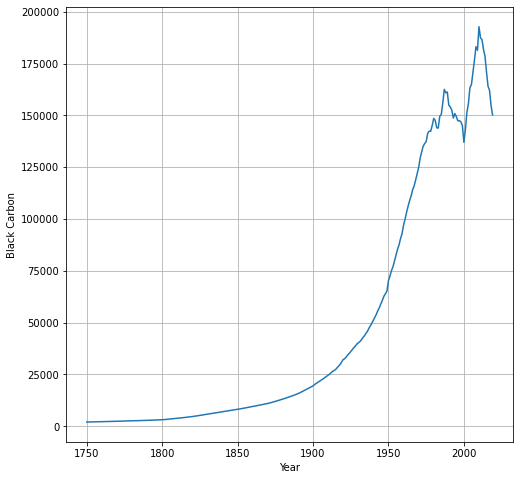

In [12]:
# País e coluna selecionados nas variáveis 'country_ref' e 'item_ref' respectivamente

sns.lineplot(data = df_country, x = 'Year', y = item_ref).figure.set_size_inches(8,8)

plt.grid()

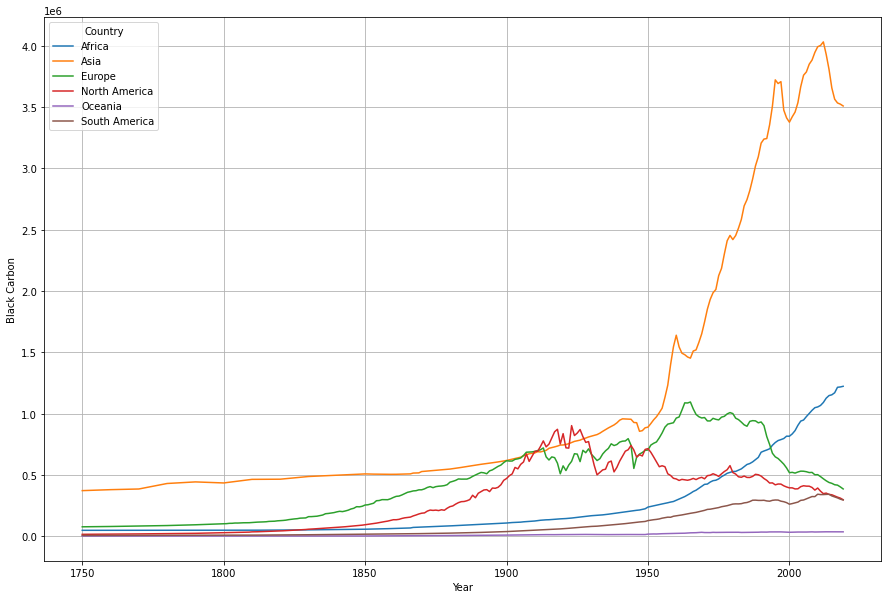

In [13]:
# Continentes e um coluna de dados ao longo do tempo

h = sns.lineplot(data=df_continents, x='Year', y= item_ref , hue='Country')
h.figure.set_size_inches(15,10)

plt.grid()

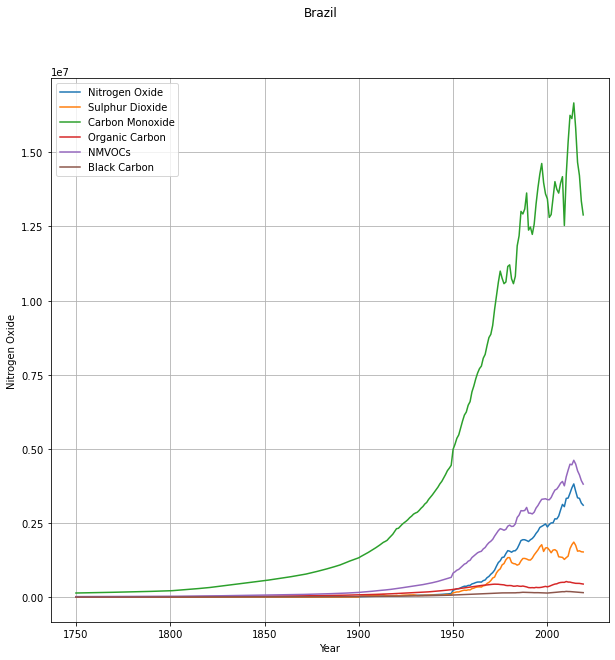

In [14]:
# País e os dados ao longo do tempo

fig, ax = plt.subplots(figsize = (10,10))

fig.suptitle(country_ref)

sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[2], label = df_country.columns[2])
sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[3], label = df_country.columns[3])
sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[4], label = df_country.columns[4])
sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[5], label = df_country.columns[5])
sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[6], label = df_country.columns[6])
sns.lineplot(data = df_country, x = 'Year', y = df_country.columns[7], label = df_country.columns[7])

plt.grid()

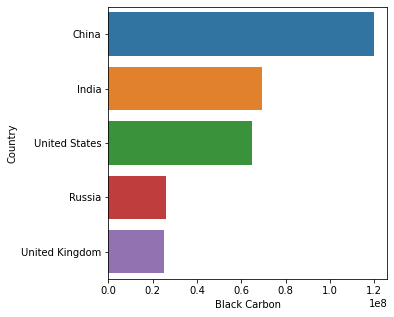

In [15]:
# Relacionando os n primeiros país que lideram o ranking em relação à coluna 'item_ref'
sns.barplot(data = df_countries_grouped.head(num_ranking), x = item_ref, y = 'Country').figure.set_size_inches(5,5)


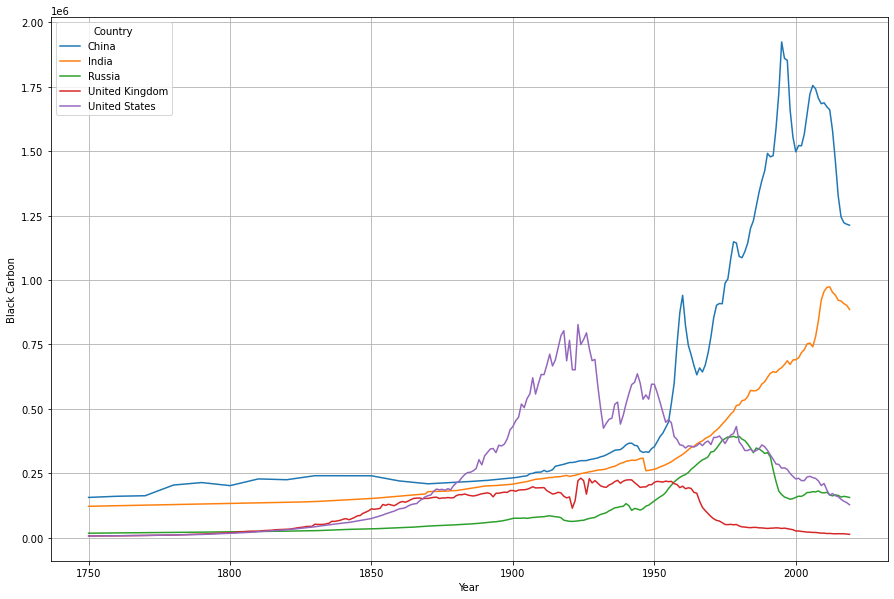

In [16]:
# Comparando os países líderes no ranking da variável 'item_ref'

sns.lineplot(data = df_ranking, x = 'Year', y = item_ref, hue = 'Country').figure.set_size_inches(15,10)
plt.grid()